# Grid Search
- 기법 : 사전에 탐색할 값들을 미리 지정해주고, 그 값들의 모든 조합을 바탕으로 성능의 최고점을 찾아냅니다.
- 장점 : 내가 원하는 범위를 정확하게 비교 분석이 가능하다. 
- 단점 : 시간이 오래 걸린다. 성능의 최고점이 아닐 가능성이 높다. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import seaborn as sns 

# 데이터 탐색 및 전처리
- 크게 전처리를 하지 않고 간단하게 하였습니다.

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')


In [6]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [7]:
test.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [9]:
train = train.fillna(0)
test = test.fillna(0)

In [10]:
def get_month(date):
    month = date[3:5]
    month = int(month)
    return month
train['Month'] = train['Date'].apply(get_month)
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month
0,1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90,2
1,2,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44,2
2,3,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17,2
3,4,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59,2
4,5,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68,3


In [11]:
def get_year(date):
    year = date[8:10]
    year = int(year)
    return year
train['year'] = train['Date'].apply(get_year)
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,year
0,1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90,2,10
1,2,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44,2,10
2,3,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17,2,10
3,4,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59,2,10
4,5,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68,3,10


In [12]:
def holiday_to_number(isholiday):
    if isholiday == True:
        number = 1
    else:
        number = 0
    return number
train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_number)
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,year,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90,2,10,0
1,2,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44,2,10,1
2,3,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17,2,10,0
3,4,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59,2,10,0
4,5,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68,3,10,0


In [13]:
train_holiday = train[train['NumberHoliday']==1].index
train = train.drop(train_holiday)

In [14]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,year,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,10,0
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,10,0
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,10,0
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,10,0
5,6,1,12/03/2010,57.79,2.667,0.00,0.00,0.00,0.00,0.00,8.106,False,1439541.59,3,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,6250,45,24/08/2012,72.62,3.834,7936.20,58.38,22.00,5518.07,2291.97,8.684,False,718232.26,8,12,0
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,12,0
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,12,0
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,12,0


In [15]:
train = train[['id', 'Store', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
        'Weekly_Sales', 'Month', 'year']]

<AxesSubplot:ylabel='Frequency'>

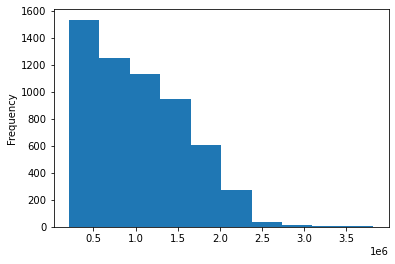

In [16]:
train['Weekly_Sales'].plot.hist()

In [17]:
train10 = train[train['year']==10]
train11 = train[train['year']==11]
train12 = train[train['year']==12]


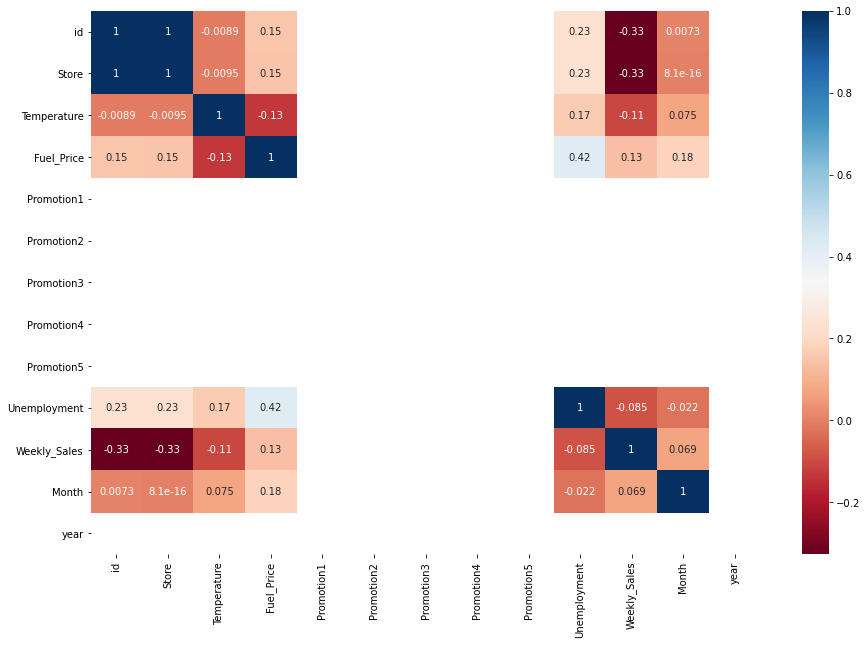

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(train10.corr(),annot=True,cmap='RdBu');

- 2010년도에는 프로모션이 없었기에 상관관계수가 안 나타난다.

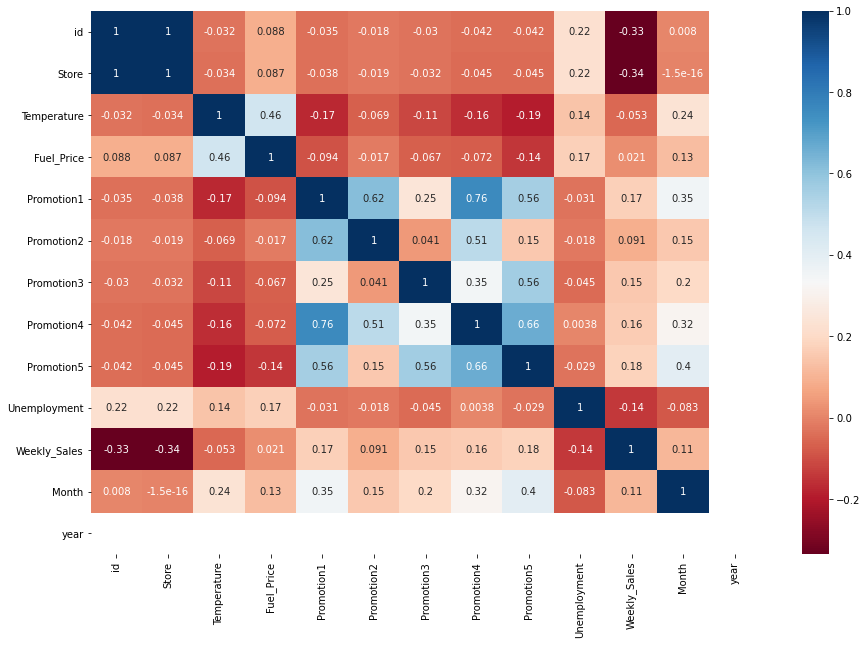

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(train11.corr(),annot=True,cmap='RdBu');

- 2011년부터는 프로모션을 진행하였는데 프로모션1과 4 상품 프로모션 4와 5상품이 상관계수가 높은 것을 확인할 수 있다.
- 두 제품은 관련성이 있다고 볼 수 있다.

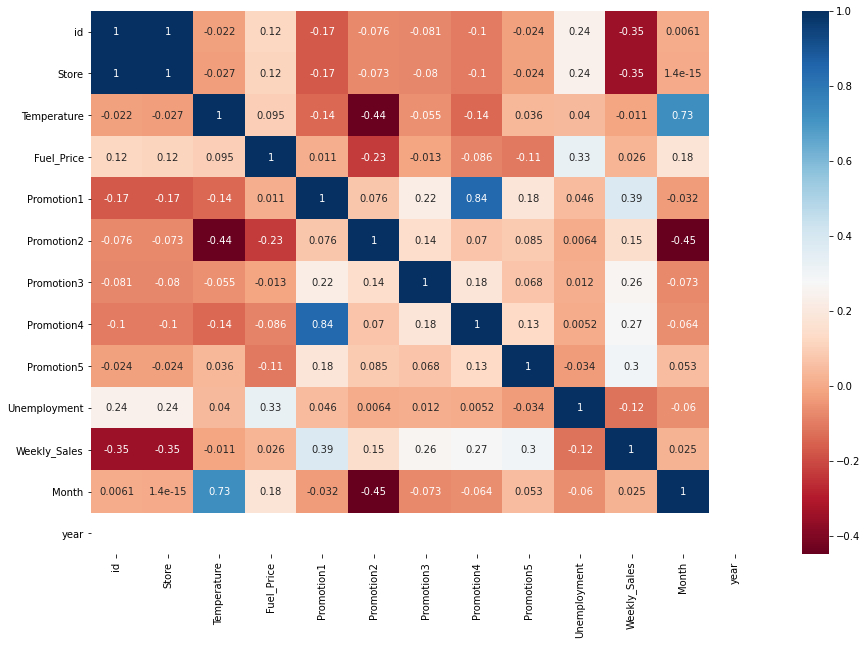

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(train12.corr(),annot=True,cmap='RdBu');

- 2012년에는 프로모션 1과 4 상품, Month와 온도가 연관이 높다

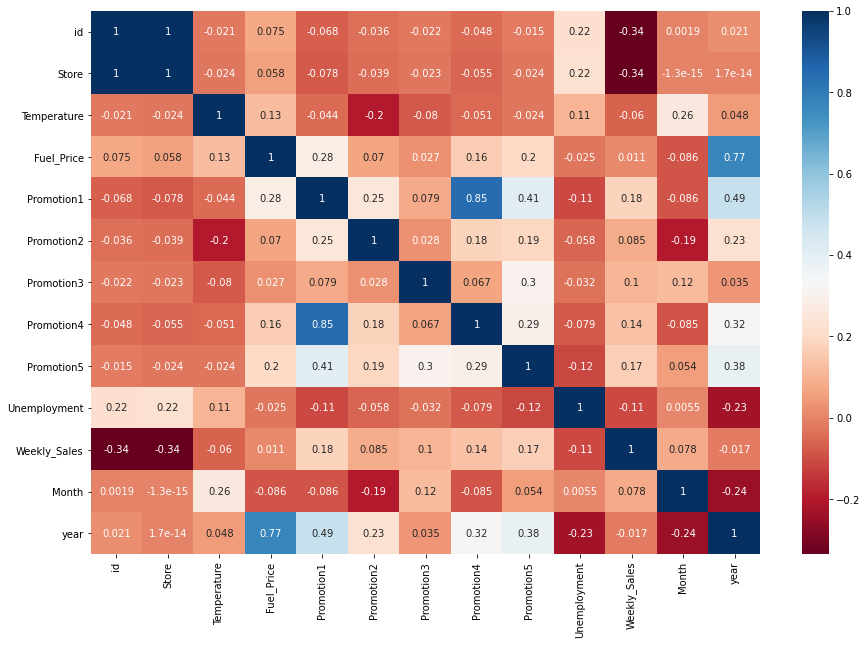

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap='RdBu');

In [22]:
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,5805.000000,5805.000000,5805.000000,5805.000000,5805.000000
mean,2407.695233,567.360705,59.097456,996.115168,1541.055413
std,6003.682723,2918.301740,612.516975,3828.670644,4220.803009
min,0.000000,-265.760000,-29.100000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1911.020000,0.000000,2.280000,192.660000,1775.540000
max,88646.760000,45971.430000,25959.980000,67474.850000,108519.280000


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])
scaled = scaler.transform(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])
train[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled
train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,Weekly_Sales,Month,year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,1643690.90,2,10,-0.401071,-0.194431,-0.096491,-0.260195,-0.365141
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,1611968.17,2,10,-0.401071,-0.194431,-0.096491,-0.260195,-0.365141
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,1409727.59,2,10,-0.401071,-0.194431,-0.096491,-0.260195,-0.365141
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,1554806.68,3,10,-0.401071,-0.194431,-0.096491,-0.260195,-0.365141
5,6,1,57.79,2.667,0.00,0.00,0.00,0.00,0.00,8.106,1439541.59,3,10,-0.401071,-0.194431,-0.096491,-0.260195,-0.365141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,6250,45,72.62,3.834,7936.20,58.38,22.00,5518.07,2291.97,8.684,718232.26,8,12,0.920932,-0.174425,-0.060571,1.181179,0.177923
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,734297.87,8,12,3.537068,-0.192375,0.055240,1.565220,0.580763
6252,6253,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,702238.27,9,12,1.499251,-0.194431,-0.089470,0.633592,0.883288
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,723086.20,9,12,1.006886,-0.162808,0.006764,0.360539,1.689242


In [24]:
train = train.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

In [25]:
test['Month'] = test['Date'].apply(get_month)
test['year'] = test['Date'].apply(get_year)
test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_number)
test_holiday = test[test['NumberHoliday']==1].index
test = test.drop(test_holiday)
scaled = scaler.transform(test[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

test[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled

test = test.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])
test = test[['Store', 'Temperature', 'Fuel_Price', 'Unemployment',
        'Month', 'year', 'Scaled_Promotion1',
       'Scaled_Promotion2', 'Scaled_Promotion3', 'Scaled_Promotion4',
       'Scaled_Promotion5']]
x_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

In [31]:
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
from sklearn.ensemble import RandomForestRegressor
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [34]:
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(test)

In [40]:
rf_param_grid = {
    'n_estimators' : [10, 20, 30,40,50],
    'max_depth' : [4, 6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 16, 20,24],
    'min_samples_split' : [2, 3, 5, 7, 10]
}

- 탐색 범위 설정

In [41]:
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, scoring="accuracy", n_jobs= -1, verbose = 1)
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(estimator=RandomForestRegressor(max_depth=4, min_samples_leaf=3,
                                             random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 16, 20, 24],
                         'min_samples_split': [2, 3, 5, 7, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=1)

In [42]:
print("최고 평균 정확도 : {0:.4f}".format(rf_grid.best_score_))
print("최고의 파라미터 : ", rf_grid.best_params_)

최고 평균 정확도 : nan
최고의 파라미터 :  {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 10}


In [43]:
rf = RandomForestRegressor(random_state = 123,n_estimators=10,max_depth=4,min_samples_leaf=8,min_samples_split=2)
rf.fit(x_train,y_train)
predict = rf.predict(test)
sample_submission['Weekly_Sales'] = predict
sample_submission

,id,Weekly_Sales
0,1,1.493028e+06
1,2,1.561313e+06
2,3,1.352466e+06
3,4,1.352466e+06
4,5,1.811431e+06
...,...,...
175,176,5.513035e+05
176,177,6.949936e+05
177,178,7.865990e+05
178,179,6.736076e+05


In [44]:
sample_submission.to_csv('Sales2.csv',index=False)